
## COCO 2015 Image Captioning Task

https://cocodataset.org/

COCO Custom Dataset compatible with torch.utils.data.DataLoader.


In [1]:
from pycocotools.coco import COCO
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# to make interactive plotting possible
%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [3]:
dataset_dir='../data/coco/'
data_type='train2014'

ann_file = os.path.join(dataset_dir,'annotations',f'captions_{data_type}.json')
coco=COCO(ann_file)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


In [4]:
some_id = coco.getImgIds()[5]

In [5]:
img_info = coco.loadImgs([some_id])[0]
img_info

{'license': 3,
 'file_name': 'COCO_train2014_000000547471.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000547471.jpg',
 'height': 640,
 'width': 383,
 'date_captured': '2013-11-14 16:48:45',
 'flickr_url': 'http://farm7.staticflickr.com/6146/5976678628_8776fd68b0_z.jpg',
 'id': 547471}

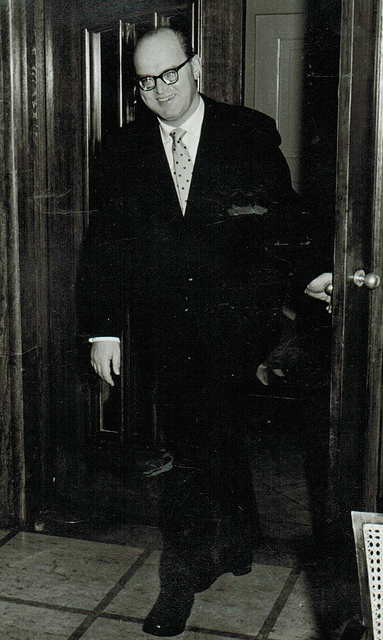

In [6]:
img = Image.open(os.path.join(dataset_dir,data_type,img_info['file_name']))
img

In [7]:
coco.showAnns(
    coco.loadAnns(
        coco.getAnnIds(imgIds=[some_id])
    )
)

A black and white image of a man in a suit wearing glasses walking through a door.
A nicely dressed man in a door way.
A man in glasses walks through an open door. 
 A man smiling and walking through a doorway.
A black and white photo of a man in suit and tie.


## With dataset class

In [8]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

cap = dset.CocoCaptions(root = os.path.join(dataset_dir,data_type),
                        annFile = ann_file,
                        )


loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


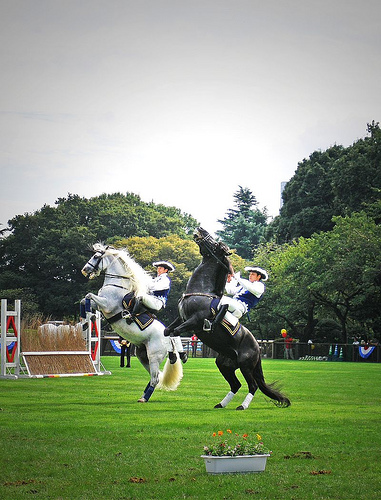

In [9]:
cap[5][0]

In [11]:

cap[5][1]

['A couple of men riding horses on top of a green field.',
 'two horses and their riders on some grass',
 'Two men are on horses that are reared back.',
 'A pair of horses performing tricks in a field. ',
 'Two costumed horse riders make their horses stand on their hind legs.']

## Custom dataset with vocab and collation

In [12]:
path_source = "../src"
sys.path.append(path_source)

In [15]:
from datasets.ds_coco import CocoDataProvider
data_provider = CocoDataProvider(path_data = dataset_dir)

Load vocab from cache...
loading annotations into memory...
Done (t=0.52s)
creating index...
index created!
Load vocab from cache...
loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


In [18]:
# When iteration starts, queue and thread start to load dataset from files.
data_iter = iter(data_provider.loader['train'])

In [19]:
batch = next(data_iter)

In [20]:
images, targets, lengths = batch

In [21]:
targets

tensor([[   1,    4,  170,  ...,  161,  783,    2],
        [   1,   78,    4,  ...,    2,    0,    0],
        [   1,    4,  553,  ...,    0,    0,    0],
        ...,
        [   1,    4,   58,  ...,    0,    0,    0],
        [   1,    4, 2078,  ...,    0,    0,    0],
        [   1,    4,   92,  ...,    0,    0,    0]])

In [22]:
lengths

[25,
 23,
 22,
 22,
 19,
 18,
 17,
 17,
 17,
 17,
 16,
 16,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10]

## Vocab builder

In [29]:
from datasets.vocab_coco import VocabularyBuilder
vocab = VocabularyBuilder.build(caption_path=ann_file, threshold=4)

loading annotations into memory...
Done (t=0.57s)
creating index...
index created!
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the captions.
[20000/414113] Tokenized the captions.
[21000/414113] Tokenized the captions.
[22000/414113] Tokenized the captions.
[23000/414113] Tokenized the captions.
[24000/414113] Tokenized the 

In [32]:
vocab('house')

138

In [34]:
vocab_path=os.path.join(dataset_dir,'vocab','train.pkl')
VocabularyBuilder.save(vocab=vocab, vocab_path=vocab_path)

In [36]:
vocab = VocabularyBuilder.load(vocab_path=vocab_path)
vocab('house')

138